# MNIST using numpy from scratch

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data')

print("train X shape",mnist.train.images.shape)
print("test X shape",mnist.test.images.shape)
print("train y shape",mnist.train.labels.shape)
print("test y shape",mnist.test.labels.shape)
print("validation x shape",mnist.validation.images.shape)
print("validation y shape",mnist.validation.labels.shape)

Extracting MNIST_data\train-images-idx3-ubyte.gz
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz
train X shape (55000, 784)
test X shape (10000, 784)
train y shape (55000,)
test y shape (10000,)
validation x shape (5000, 784)
validation y shape (5000,)


In [86]:
class NeuralNetwork(object):
    def __init__(self, input_nodes, hidden_nodes, output_nodes, learning_rate):
        # Set number of nodes in input, hidden and output layers.
        self.input_nodes = input_nodes
        self.hidden_nodes = hidden_nodes
        self.output_nodes = output_nodes
         # Initialize weights
        self.weights_input_to_hidden = 0.01 * np.random.randn(input_nodes,hidden_nodes)

        self.weights_hidden_to_output = 0.01 * np.random.randn(hidden_nodes,output_nodes)
        
        # Learning rate
        self.lr = learning_rate
        # Regularization strength
        self.reg = 0
        
    def train(self, features, targets):
        # Total n.o of records
        num_examples=features.shape[0]
        
        # Forward propagation
        hidden_input = np.dot(features,self.weights_input_to_hidden) # Hidden input np.dot(X,w_i_h)
        hidden_output=np.maximum(0,hidden_input) # Hidden output is relu of hidden input
       
        final_input = np.dot(hidden_output,self.weights_hidden_to_output) # final input is hidden_outputs x weights_h_o
        exp_scores = np.exp(final_input) 
        final_output = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) # final output is softmax(final_input)  
        
        # Loss calculation cross entropy loss(-ylog(y^))
        log_probs = -np.log(final_output[range(num_examples),targets]) 
        
        # Mean of loss
        data_loss = np.sum(log_probs)/num_examples 
        
        # Regularization loss
        reg_loss = 0.5*self.reg*np.sum(self.weights_input_to_hidden*self.weights_input_to_hidden) + 0.5*self.reg*np.sum(self.weights_hidden_to_output*self.weights_hidden_to_output)
        
        # Total loss
        loss = data_loss + reg_loss 
        
        
        # Backpropagation
        # Error at output(Softmax) (y_predicted - target) or (Yi - Ti)
        error = final_output
        error[range(num_examples),targets] -= 1
        error /= num_examples
        
        delta_weights_hidden_to_output = np.dot(hidden_output.T, error) # output error term
        delta_weights_input_to_hidden = np.dot(error, self.weights_hidden_to_output.T) # hidden error
        delta_weights_input_to_hidden[hidden_output <= 0] = 0 # relu gradient
        delta_weights_input_to_hidden = np.dot(features.T, delta_weights_input_to_hidden) # hidden error term
        
        
        delta_weights_hidden_to_output += self.reg * self.weights_hidden_to_output # Regularization step
        delta_weights_input_to_hidden += self.reg * self.weights_input_to_hidden # Regularization step
        
        self.weights_input_to_hidden += -self.lr * delta_weights_input_to_hidden # update weights input to hidden
        self.weights_hidden_to_output += -self.lr * delta_weights_hidden_to_output # update weights hidden to output
        return loss
        
    def run(self,X,y):
        hidden_layer = np.maximum(0, np.dot(X, self.weights_input_to_hidden))
        scores = np.dot(hidden_layer, self.weights_hidden_to_output)
        predicted_class = np.argmax(scores, axis=1)
        return np.mean(predicted_class == y)

In [92]:
losses = {'train':[],'train_accuracy':[],'test_accuracy':[],'validation_accuracy':[]}

In [93]:
X_train=pd.DataFrame(mnist.train.images)
y_train=pd.DataFrame(mnist.train.labels)

In [94]:
network = NeuralNetwork(784, 100, 10, 0.1)
for ii in range(200):     
    loss = network.train(mnist.train.images, mnist.train.labels)
    train_accuracy=network.run(mnist.train.images,mnist.train.labels)
    test_accuracy=network.run(mnist.test.images,mnist.test.labels)
    validation_accuracy=network.run(mnist.validation.images,mnist.validation.labels)
    losses['train'].append(loss)
    losses['train_accuracy'].append(train_accuracy)
    losses['test_accuracy'].append(test_accuracy)
    losses['validation_accuracy'].append(validation_accuracy)
    if ii % 10 ==0:
        print('interation %d --loss %f -- train accuracy:%.2f ----test accuracy: %.2f ---- validation accuracy: %.2f' % (ii,loss,train_accuracy,test_accuracy,validation_accuracy))

interation 0 --loss 2.302319 -- train accuracy:0.16 ----test accuracy: 0.17 ---- validation accuracy: 0.17
interation 10 --loss 2.291347 -- train accuracy:0.42 ----test accuracy: 0.43 ---- validation accuracy: 0.42
interation 20 --loss 2.271566 -- train accuracy:0.46 ----test accuracy: 0.47 ---- validation accuracy: 0.46
interation 30 --loss 2.230237 -- train accuracy:0.47 ----test accuracy: 0.47 ---- validation accuracy: 0.47
interation 40 --loss 2.147277 -- train accuracy:0.52 ----test accuracy: 0.52 ---- validation accuracy: 0.52
interation 50 --loss 1.999042 -- train accuracy:0.62 ----test accuracy: 0.61 ---- validation accuracy: 0.62
interation 60 --loss 1.775215 -- train accuracy:0.68 ----test accuracy: 0.68 ---- validation accuracy: 0.69
interation 70 --loss 1.512310 -- train accuracy:0.70 ----test accuracy: 0.71 ---- validation accuracy: 0.70
interation 80 --loss 1.276796 -- train accuracy:0.72 ----test accuracy: 0.73 ---- validation accuracy: 0.72
interation 90 --loss 1.096460

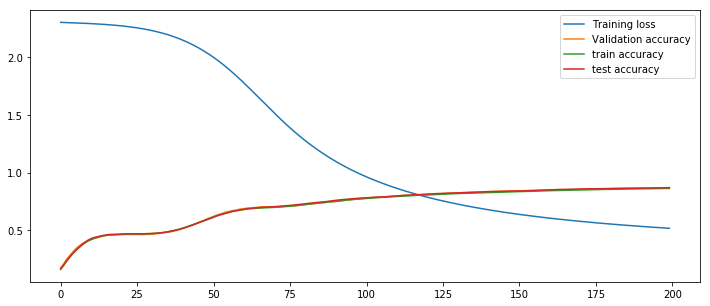

In [99]:
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(12, 5))
plt.plot(losses['train'], label='Training loss')
plt.plot(losses['validation_accuracy'], label='Validation accuracy')
plt.plot(losses['train_accuracy'], label='train accuracy')
plt.plot(losses['test_accuracy'], label='test accuracy')
plt.legend()
plt.show()